In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
url = "https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP_per_capita"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', {'class': 'wikitable'})
rows = table.find_all('tr')
data = []
for row in rows[1:]:
    columns = row.find_all('td')
    state = columns[1].text.strip()
    income = columns[4].text.strip()
    income = re.sub(r'\$|,','',income)
    data.append((state, float(income)))
df = pd.DataFrame(data, columns=['State', 'Per Capita Income'])
df.to_csv('per_capita_income.csv', index=False)
mean_income = df['Per Capita Income'].mean()
median_income = df['Per Capita Income'].median()
print(f"Mean income: {mean_income}")
print(f"Median income: {median_income}")

Mean income: 12222.382352941177
Median income: 11461.0


In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
shapefile_path = 'india_ds.shp'
india = gpd.read_file(shapefile_path)
print(india.head())

   DST_ID DISTRICT              STATE  \
0       1   Gilgit  JAMMU AND KASHMIR   
1       2   Kargil  JAMMU AND KASHMIR   
2       3   Ladakh  JAMMU AND KASHMIR   
3       4   Chilas  JAMMU AND KASHMIR   
4       5  Kupwara  JAMMU AND KASHMIR   

                                            geometry  
0  POLYGON ((74.30254 35.65012, 73.84581 35.82461...  
1  POLYGON ((74.89890 35.62939, 75.04768 35.77413...  
2  POLYGON ((75.98059 35.93823, 76.16165 35.91142...  
3  POLYGON ((73.27244 35.81596, 73.32610 35.79237...  
4  POLYGON ((74.30254 35.65012, 74.54015 35.50695...  


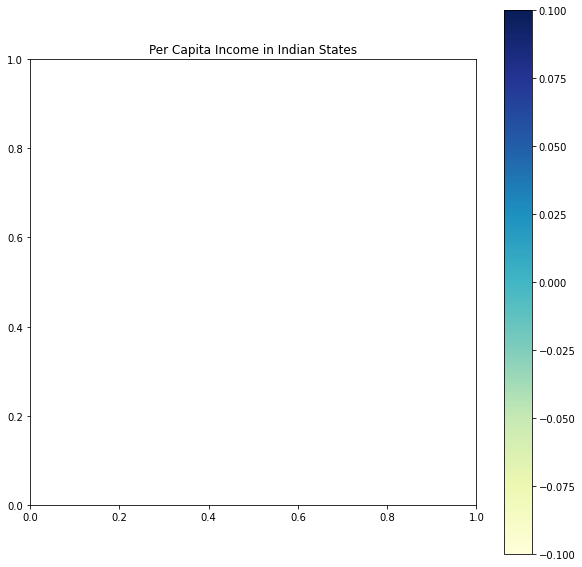

In [8]:
merged = india.merge(df, left_on='STATE', right_on='State', how='left')

fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(column='Per Capita Income', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Per Capita Income in Indian States')
plt.show()